In [1]:
def exp(b, n):
    if n == 0:
        return 1
    else:
        return b * exp(b, n-1)

In [32]:
%%time
exp(2, 400)

CPU times: user 180 µs, sys: 0 ns, total: 180 µs
Wall time: 185 µs


2582249878086908589655919172003011874329705792829223512830659356540647622016841194629645353280137831435903171972747493376

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font', size=16)

from timeit import repeat
from numpy import median, percentile

def plot_times(name, xs, n=15):
    f = lambda x: name + '(' + str(x) + ')'
    g = globals()
    
    samples = []
    for _ in range(n):
        times = lambda x: repeat(f(x), globals=g, number=1, repeat=n)
        samples.append([median(times(x)) for x in xs])
    ys = [10e3 * median(sample) for sample in zip(*samples)]
    
    plt.figure(figsize=(8, 8))
    plt.plot(xs, ys)
    plt.xlabel('n')
    plt.ylabel('milliseconds')

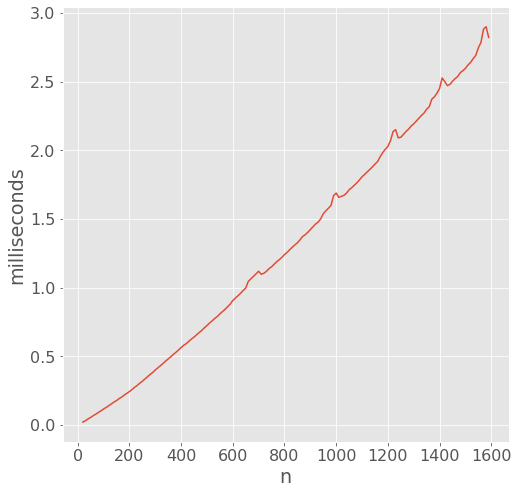

In [13]:
exp_2 = lambda n: exp(2, n)
plot_times('exp_2', range(20, 1600, 10))

In [14]:
def exp_fast(b, n):
    if n == 0:
        return 1
    elif n % 2 == 0:
        return square(exp_fast(b, n//2))
    else:
        return b * exp_fast(b, n-1)
    
def square(x):
    return x*x

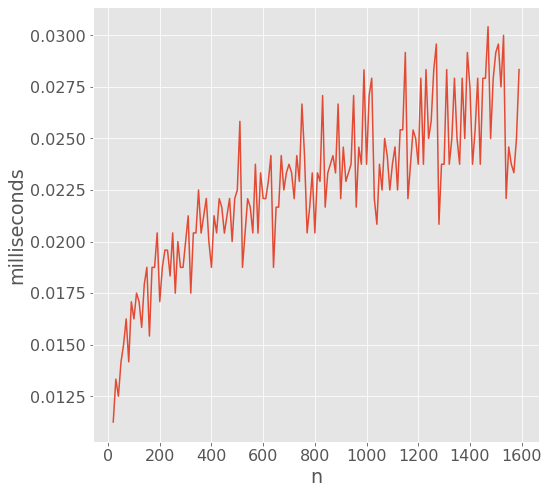

In [15]:
exp_2_fast = lambda n: exp_fast(2.0, n)
plot_times('exp_2_fast', range(20, 1600, 10))

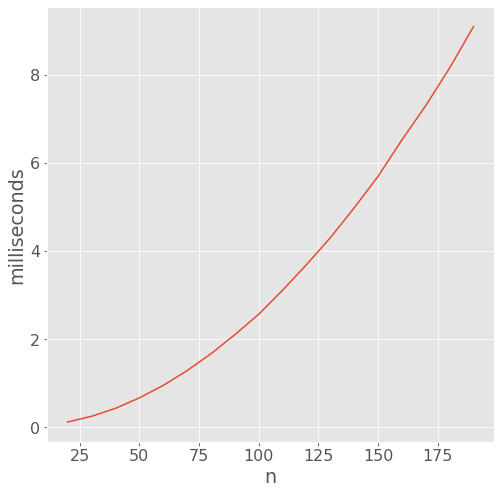

In [33]:
def overlap(a, b):
    count = 0
    for item in a:
        for other in b:
            if item == other:
                count += 1
    return count

overlap_ranges = lambda n: overlap(list(range(n)), list(range(n)))

plot_times('overlap_ranges', range(20, 200, 10))